In [35]:
#!pip install vaderSentiment 

#Importing Necessary libraries
import pandas as pd
import numpy as np
import nltk
import statistics
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
#Importing the data sets

low = pd.read_excel('low.xlsx')
high = pd.read_excel('high.xlsx')
google = pd.read_excel('google.xlsx')

### Data Wrangling and Pre-processing

In [37]:
#Appending the low and high files
#Both files are company review data from trustpilot website

trustpilot = low.append(high)

In [38]:
#merging the trust pilot reviews to google reviews
alldata = pd.merge(trustpilot,google, on = 'website')

In [39]:
alldata.shape

(42454, 20)

In [40]:
alldata.head()

,Company_Name,Category_1,Category_2,Category_3,Email,Phone_x,Address_x,Overall_rating,website,Company_Website,Total_reviews,Page_URL,Review_Title,Review_Text,input_website,Name,Address_y,Rating,No_Reviews,Phone_y
0,Flashbay,Business Services,Sales & Marketing,Promotional Item Store,contact@flashbay.us,NaN,"Flashbay Inc. 569 Clyde Avenue, Unit 500, Moun...",4.9,flashbay.com,flashbay.com,"16,737",trustpilot.com/review/flashbay.com,Great service until delivery,Great customer service through review of model...,www.flashbay.com,Flashbay,"569 Clyde Ave #500, Mountain View, CA 94043",4.8,5,(650) 938-3500
1,Flashbay,Business Services,Sales & Marketing,Promotional Item Store,contact@flashbay.us,NaN,"Flashbay Inc. 569 Clyde Avenue, Unit 500, Moun...",4.9,flashbay.com,flashbay.com,"16,737",trustpilot.com/review/flashbay.com,Nuisance,Why are you spam calling a Canadian phone number?,www.flashbay.com,Flashbay,"569 Clyde Ave #500, Mountain View, CA 94043",4.8,5,(650) 938-3500
2,Flashbay,Business Services,Sales & Marketing,Promotional Item Store,contact@flashbay.us,NaN,"Flashbay Inc. 569 Clyde Avenue, Unit 500, Moun...",4.9,flashbay.com,flashbay.com,"16,737",trustpilot.com/review/flashbay.com,Couldn't even get a quote!,I found flashbay through a popular photographe...,www.flashbay.com,Flashbay,"569 Clyde Ave #500, Mountain View, CA 94043",4.8,5,(650) 938-3500
3,Flashbay,Business Services,Sales & Marketing,Promotional Item Store,contact@flashbay.us,NaN,"Flashbay Inc. 569 Clyde Avenue, Unit 500, Moun...",4.9,flashbay.com,flashbay.com,"16,737",trustpilot.com/review/flashbay.com,Its very fantastic,Its very fantastic and ilove its helping me ve...,www.flashbay.com,Flashbay,"569 Clyde Ave #500, Mountain View, CA 94043",4.8,5,(650) 938-3500
4,Flashbay,Business Services,Sales & Marketing,Promotional Item Store,contact@flashbay.us,NaN,"Flashbay Inc. 569 Clyde Avenue, Unit 500, Moun...",4.9,flashbay.com,flashbay.com,"16,737",trustpilot.com/review/flashbay.com,dont spam adverts,dont spam adverts. Word of mouth means your wo...,www.flashbay.com,Flashbay,"569 Clyde Ave #500, Mountain View, CA 94043",4.8,5,(650) 938-3500


In [41]:
#Creating a column for average rating across the different review platforms

alldata['Average_Rating'] = alldata[['Overall_rating','Rating']].mean(axis=1)

In [42]:
#Grouping the data based on the companies
#Combining the different reviews for each company into a large  text string

alldatagroup = alldata.groupby(["Company_Name",'Average_Rating'])

grouped_lists = alldatagroup["Review_Text"].apply(list)

grouped_lists = grouped_lists.reset_index()

grouped_lists['Review_Text'] = [','.join(map(str, l)) for l in grouped_lists['Review_Text']]

In [43]:
#defining the sentiments as positive and negative
def sentiment(n):
    return 'Positive' if n >= 3 else 'Negative'
grouped_lists['Expected_Sentiment'] = grouped_lists['Average_Rating'].apply(sentiment)


In [44]:
#Confirming the grouping, average rating and the sentiment,
grouped_lists.head()

,Company_Name,Average_Rating,Review_Text,Expected_Sentiment
0,4 Corners Cannabis CBD,4.95,Your website checkout process was atrocious. I...,Positive
1,ACityDiscount,4.90,"nan,nan,Rudy Herring was great to work with. I...",Positive
2,AceableAgent,4.65,They lost 3 stars by asking me to rate my expe...,Positive
3,Ambassador Leaders,4.95,Ambassador Leaders was the very first formal l...,Positive
4,ArcataPet.com,4.70,I was very disappointed with the quality of th...,Positive


### Sentiment Analysis

Name of the Company: AceableAgent
The company's review sentiment is: ('Positive',)


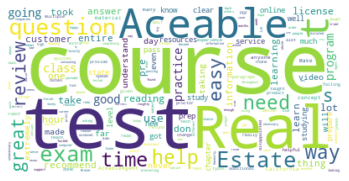

In [68]:
#Input variable to take in the company name
name = (input("Name of the Company: "))


#extracting the review text for specified company
review =str(grouped_lists.loc[grouped_lists['Company_Name'] == name, ['Review_Text']].values[0])

#extracting the average review rating and expected sentiment based on the review rating
Rating =(grouped_lists.loc[grouped_lists['Company_Name'] == name, ['Average_Rating','Expected_Sentiment']] )

#Analyzing the text using the sentiment analyzer
analyzer_result = SentimentIntensityAnalyzer().polarity_scores(review)


Sentiment_Sccore = pd.DataFrame(list(vs.items()),columns = ['Attribute','Score']) 


compound_score = Sentiment_Sccore['Score'][3]


#The compound score is computed by summing the valence scores of each word in the lexicon,
#adjusted according to the rules, and then normalized to be between -1 (most extreme negative)
#and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional 
#measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

#It is also useful for researchers who would like to set standardized thresholds for classifying
#sentences as either positive, neutral, or negative. 

#Typical threshold values (used in the literature cited on this page) are:

#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05




#Defining a function to print the sentiment based on the compound score

def Sentiment(n):
    if n >= 0.05:
        return 'Positive',
    elif n <=-0.05:
        return 'Negative'
    else:
        return 'Neutral'

    
    
#INSTRUCTION TO PRINT RESULTS 

print("The company's review sentiment is:",Sentiment(compound_score))

    
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(wc_input)

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

